**$$\textbf{Probabilidad de Ruina a Timepo Discreto}$$**
$\textbf{}$
$$\textbf{José Muñoz Casares}$$

Si lo que quieres calcular sigue una distribución ingresa 0, de otra forma ingresa 1, si quiere la ruina del jugador ingrese 2 : 1
Si lo que ambiciona calcular tiene horizonte infinito ingresa 0, en caso contrario ingresa 1 (finito): 1
¿Cuántos elementos tiene su variable aleatoria? 3
Ingrese el valor de x_0: 0
Ingrese P(X=0.0): 0.33333
Ingrese el valor de x_1: 1
Ingrese P(X=1.0): 0.5
Ingrese el valor de x_2: 2
Ingrese P(X=2.0): 0.16667

Tabla de función de densidad (FDP):
------------------------------------------------------
|  x   | P(X=x) | P(X<=x)|
------------------------------------------------------
| 0.00 | 0.3333 | 0.3333 |
| 1.00 | 0.5000 | 0.8333 |
| 2.00 | 0.1667 | 1.0000 |
------------------------------------------------------
Esperanza: 0.8333400000
Ingresa los valores que quieres que u tenga separados por espacios (u>=0): 0 1
Valores de u que diste: [0, 1]
Ingresa los valores que quieres que n tenga separados por espacios (n>0): 1 2 3 4 5 6 7 8 9
Valores de n que diste:

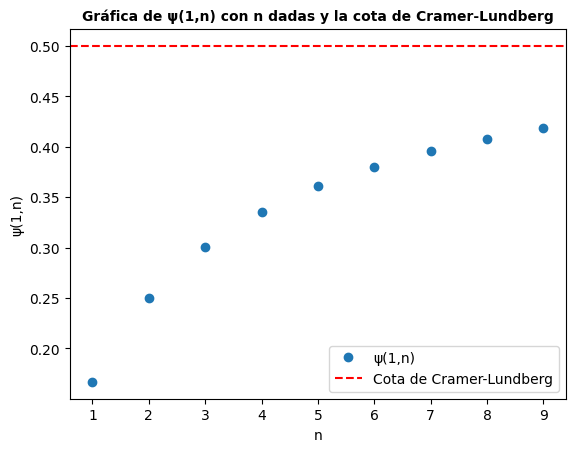

In [ ]:
def reclamaciones_bernoulli():
    #Preguntar al jugador cual es el valor de p
  p = float(input("¿Cuál es el valor del parámetro p? "))

  # Validar el valor de p
  if p <= 0  or p > 1:
    raise ValueError("El valor de p debe estar en 0 <= p < 1")

  print(f"En este caso ψ(0) = {p} y ψ(u) = 0 para toda u >= 1 ")
  print("No existe el coeficiente de ajuste en este caso.")
  print("Exceptuando esta distribuciÓn, se puede garantizar la existencia del coeficiente de ajuste para cualquier distribuciÓn de probabilidad sobre el conjunto {0, 1, 2, ...} con funciÓn generadora de momentos finita y con esperanza menor a 1.")

def reclamaciones_geometricas_horizonte_infinito():

  import math
  import matplotlib.pyplot as plt

  #Preguntar al jugador cual es el valor de p
  p = float(input("¿Cuál es el valor del parámetro p? "))

  # Validar el valor de p
  if p <= 0  or p > 1:
    raise ValueError("El valor de p debe estar en 0 <= p < 1")

  # Inicializar lista vacía para almacenar los valores u e ingresar los valores de u
  u_i = [int(valor) for valor in input("Ingresa los valores de u para los que quieras calcular  ψ(u) (u>=0): ").split()]


  #Calcular ψ(u) para cada valor en u_i
  def ψ(u, p):
    if u == 0:
      return (1-p)/p
    else:
      return ((1-p)/p)**(u+1)
  for u in u_i:
    resultado = ψ(u, p)
    print(f"ψ({u}) = {resultado}")

  #Coeficiente de ajuste
  R = math.log(p / (1 - p))
  print(f"El valor del coeficiente de ajuste 'R' es {R}")
  print(f"∀ψ(u) <= e^(-{R}*u)) es la cota de Cramer-Lundberg")

  #Grafica
  psi_grafica = []
  for u in u_i:
    resultado = ψ(u,p)
    psi_grafica.append(resultado)

  # Graficar psi vs n_i (puntos) y Cota de Cramer-Lundberg
  plt.plot(u_i, psi_grafica, marker='o', linestyle='none', label=f'ψ(u)')
  plt.xlabel("u")
  plt.ylabel("ψ(u)")
  plt.title(f"Gráfica de ψ(u)", fontdict={'fontsize': 10, 'weight': 'bold'})
  plt.legend()
  plt.show()

  #SEVERIDAD DE LA RUINA

  # Inicializar lista vacía para almacenar los valores u y z e ingresar los valores de u para calcular la severidad de la ruina
  u_i_s_r = [int(valor) for valor in input("Ingresa los valores de u para los que quieras calcular  ϕ(u,z), es decir, la severidad de la ruina (u>=0): ").split()]
  z_i_s_r = [int(valor) for valor in input("Ingresa los valores de z para los que quieras calcular  ϕ(u,z), es decir, la severidad de la ruina (z>=0): ").split()]

  def ϕ(p, u, z):
    return 1 - (1 - p) ** (z + 1) * ((1 - p) / p) ** (u + p)

  def calculate_and_print_phi(p, u_i_s_r, z_i_s_r):
    for u in u_i_s_r:
      for z in z_i_s_r:
        phi_value = ϕ(p, u, z)
        print(f"ϕ({u}, {z}) = {phi_value:.10f}")  # Impresión con 10 decimales
  calculate_and_print_phi(p, u_i_s_r, z_i_s_r)

def probabilidad_de_la_ruina_con_horizonte_inifinito_con_una_tabla_de_probabilidad_dada():
  """
  Primero, le pregunta al usuario cuántos elementos tiene su variable aleatoria.
  Luego, le pide al usuario que ingrese los valores de x (las variables aleatorias) y P(X=x) (las probabilidades) uno por uno.
  Finalmente, calcula la esperanza (media) de la variable aleatoria y la muestra en la tabla junto con los valores de x y P(X=x).

  Devuelve un diccionario que contiene los valores de x, P(X=x), P(X<=x) y la esperanza.
  """
  # Preguntar al usuario cuántos elementos tiene la variable aleatoria
  n_elementos = int(input("¿Cuántos elementos tiene su variable aleatoria? "))

  # Inicializar listas vacías para almacenar los valores de x, P(X=x), P(X<=x) y psi(u)
  x = []
  f_x = []
  F_x = []

  # Ingresar valores de x y P(X=x)
  for i in range(n_elementos):
      valor_x = float(input(f"Ingrese el valor de x_{i}: "))
      valor_f_x = float(input(f"Ingrese P(X={valor_x}): "))

      x.append(valor_x)
      f_x.append(valor_f_x)

      # Calcular P(X<=x) usando suma acumulativa
      if i == 0:
          F_x.append(valor_f_x)
      else:
          F_x.append(F_x[-1] + valor_f_x)

  # Calcular la esperanza (media)
  esperanza = sum([valor_x * valor_f_x for valor_x, valor_f_x in zip(x, f_x)])

  # Validar que la suma de elementos f_x sea igual a 1
  if sum(f_x) != 1:
      raise ValueError("I'm sorry Dave, I'm afraid I can't do that, La suma de las probabilidades (P(X=x)) debe ser igual a 1, hubo error de captura en los datos")

  # Crear un diccionario con los valores de x, P(X=x), P(X<=x) y la esperanza
  tabla_fdp = {
      "x": x,
      "P(X=x)": f_x,
      "P(X<=x)": F_x,
      "Esperanza": esperanza
  }

  # Imprimir la tabla de FDP
  print("\nTabla de función de densidad (FDP):")
  print("------------------------------------------------------")
  print("|  x   | P(X=x) | P(X<=x)|")
  print("------------------------------------------------------")
  for i, (valor_x, valor_f_x, valor_F_x) in enumerate(zip(x, f_x, F_x)):
      print(f"| {valor_x:.2f} | {valor_f_x:.4f} | {valor_F_x:.4f} |")
  print("------------------------------------------------------")
  print(f"Esperanza: {esperanza:.10f}")

  # Inicializar lista vacía para almacenar los valores u e ingresar los valores de u
  u_i = [int(valor) for valor in input("Ingresa los valores que quieres que u tenga separados por espacios (u >= 0): ").split()]
  print("Valores de u que diste:", u_i)
  print("Feliciades, se calculará ψ(u) para cada u")

  # Inicializar lista vacía para almacenar los valores la F Barra
  F_barra = []
  # Calcular 1 - f_x para cada elemento y agregarlo a F_barra
  for prob in F_x:
    F_barra.append(1 - prob)

  #Se iniciará el calculo para ψ(u)
  import math
  def psi(u, F_barra, esperanza):
    if u == 0:
      return esperanza
    elif u == 1:
      suma_F_barra = sum(F_barra[1:])
      resultado = suma_F_barra / (1 - F_barra[0])
      return resultado
    else:
      suma_F_barra = sum(F_barra[2:])
      resultado = (psi(u-1, F_barra, esperanza) + suma_F_barra) / (1 - F_barra[0])
      return (psi(u-1, F_barra, esperanza)*F_barra[1])/(1-F_barra[0])
  for u in u_i:
    resultado = psi(u, F_barra, esperanza)
    print(f"ψ({u}) = {resultado}")

  #Cota
  def funcion(r, x, f_x):
    suma_fx_exp_r = 0
    for xi, fx in zip(x, f_x):
        suma_fx_exp_r += fx * math.exp(r * (xi - 1))
    return suma_fx_exp_r
  def metodo_biseccion(limite_inferior_biseccion, limite_superior_biseccion, tol, x, f_x):
    while abs(limite_superior_biseccion - limite_inferior_biseccion) > tol:
      r_medio_biseccion = (limite_inferior_biseccion + limite_superior_biseccion) / 2
      suma_fx_exp_r = funcion(r_medio_biseccion, x, f_x)
      if suma_fx_exp_r < 1:
        limite_inferior_biseccion = r_medio_biseccion
      else:
        limite_superior_biseccion = r_medio_biseccion
    return (limite_inferior_biseccion + limite_superior_biseccion) / 2
  tol = 1e-5
  R = metodo_biseccion(0, 10, tol, x, f_x)
  print(f"El Coeficiente de ajuste 'R' es: {R}")
  print(f"∀ψ(u) <= e^(-{R}*u)) es la cota de Cramer-Lundberg")


  #Grafica
  import matplotlib.pyplot as plt
  psi_grafica = []
  for u in u_i:
    resultado = psi(u, F_barra, esperanza)
    psi_grafica.append(resultado)

  # Graficar psi vs n_i (puntos) y Cota de Cramer-Lundberg
  plt.plot(u_i, psi_grafica, marker='o', linestyle='none', label=f'ψ(u)')
  plt.xlabel("u")
  plt.ylabel("ψ(u)")
  plt.title(f"Gráfica de ψ(u)", fontdict={'fontsize': 10, 'weight': 'bold'})
  plt.legend()
  plt.show()

def probabilidad_de_la_ruina_con_horizonte_finito_con_una_tabla_de_probabilidad_dada():
  # Preguntar al usuario cuántos elementos tiene la variable aleatoria
  n_elementos = int(input("¿Cuántos elementos tiene su variable aleatoria? "))
  # Inicializar listas vacías para almacenar los valores de x, P(X=x) y P(X<=x)
  x = []
  f_x = []
  F_x = []

  # Ingresar valores de x y P(X=x)
  for i in range(n_elementos):
    valor_x = float(input(f"Ingrese el valor de x_{i}: "))
    valor_f_x = float(input(f"Ingrese P(X={valor_x}): "))

    x.append(valor_x)
    f_x.append(valor_f_x)

    # Calcular P(X<=x) usando suma acumulativa
    if i == 0:
      F_x.append(valor_f_x)
    else:
      F_x.append(F_x[-1] + valor_f_x)

  # Calcular la esperanza (media)
  esperanza = sum([valor_x * valor_f_x for valor_x, valor_f_x in zip(x, f_x)])

  # Validar que la suma de elementos f_x sea igual a 1
  if sum(f_x) != 1:
    raise ValueError("I'm sorry Dave, I'm afraid I can't do that, La suma de las probabilidades (P(X=x)) debe ser igual a 1, hubo error de captura en los datos")
    # Crear un diccionario con los valores de x, P(X=x), P(X<=x) y la esperanza
  tabla_fdp = {
      "x": x, "P(X=x)": f_x, "P(X<=x)": F_x, "Esperanza": esperanza}
  # Imprimir la tabla de FDP
  print("\nTabla de función de densidad (FDP):")
  print("------------------------------------------------------")
  print("|  x   | P(X=x) | P(X<=x)|")
  print("------------------------------------------------------")
  for i, (valor_x, valor_f_x, valor_F_x) in enumerate(zip(x, f_x, F_x)):
    print(f"| {valor_x:.2f} | {valor_f_x:.4f} | {valor_F_x:.4f} |")
  print("------------------------------------------------------")
  print(f"Esperanza: {esperanza:.10f}")

  # Inicializar lista vacía para almacenar los valores u e ingresar los valores de u
  u_i = [int(valor) for valor in input("Ingresa los valores que quieres que u tenga separados por espacios (u>=0): ").split()]
  print("Valores de u que diste:", u_i)

  #Inicializar lista vacía para almacenar los valores n e ingresar los valores de n
  n_i = [int(valor) for valor in input("Ingresa los valores que quieres que n tenga separados por espacios (n>0): ").split()]
  print("Valores de n que diste:", n_i)

  print("Feliciades, se calculará ψ(u,n) para cada u y n")

  # Inicializar lista vacía para almacenar los valores la F Barra
  F_barra = []
  # Calcular 1 - f_x para cada elemento y agregarlo a F_barra
  for prob in F_x:
    F_barra.append(1 - prob)

  #Se iniciará el calculo para ψ(u,n)
  def ψ(u, n, F_barra, f_x):
    if n == 1:
      return u_1(u, n, F_barra, f_x)
    else:
      return u_n(u, n, F_barra, f_x)
  def u_1(u, n, F_barra, f_x):
    if u == 0:
      return F_barra[0]
    elif u == 1:
      return f_x[2]
    else:
      return 0
  def u_n(u, n, F_barra, f_x):
    if u == 0:
      return u_1(0, n, F_barra, f_x)+ψ(u+1-0, n-1, F_barra, f_x)*f_x[0]
    elif u == 1:
      return u_1(1, n, F_barra, f_x) + (ψ(u+1, n-1, F_barra, f_x) * f_x[0]) + (ψ(u+1-1, n-1, F_barra, f_x)*f_x[1])
    else:
      return (ψ(u+1-0, n-1, F_barra, f_x) * f_x[0]) + (ψ(u+1-1, n-1, F_barra, f_x) * f_x[1]) + (ψ(u+1-2, n-1, F_barra, f_x) * f_x[2])

  # Obtención de todas las combinaciones
  import itertools
  combinaciones = list(itertools.product(u_i, n_i))
  # Visualización y cálculo de ψ para cada combinación
  for u, n in combinaciones:
    resultado = ψ(u, n, F_barra, f_x)  # Reemplace con sus valores reales de F_barra y f_x
    print(f"ψ({u}, {n}) = {resultado}")

  #Calculo de la cota y graficación

  #Cota
  import math
  def funcion(r, x, f_x):
    suma_fx_exp_r = 0
    for xi, fx in zip(x, f_x):
        suma_fx_exp_r += fx * math.exp(r * (xi - 1))
    return suma_fx_exp_r
  def metodo_biseccion(limite_inferior_biseccion, limite_superior_biseccion, tol, x, f_x):
    while abs(limite_superior_biseccion - limite_inferior_biseccion) > tol:
      r_medio_biseccion = (limite_inferior_biseccion + limite_superior_biseccion) / 2
      suma_fx_exp_r = funcion(r_medio_biseccion, x, f_x)
      if suma_fx_exp_r < 1:
        limite_inferior_biseccion = r_medio_biseccion
      else:
        limite_superior_biseccion = r_medio_biseccion
    return (limite_inferior_biseccion + limite_superior_biseccion) / 2
  tol = 1e-5
  R = metodo_biseccion(0, 10, tol, x, f_x)
  print(f"El Coeficiente de ajuste 'R' es: {R}")

  u_cota_c_l = int(input("¿Para qué valor de u quieres calcular la cota de Cramer-Lundberg?"))
  Cota = math.exp(-R * u)
  print(f"Tenemos que para todo ψ({u_cota_c_l},n) <= e^(-R*u) = e^(-{R}*{u_cota_c_l}) = {Cota}, i. e., ∀ψ({u_cota_c_l},n) <= {Cota}")

  #Grafica
  import matplotlib.pyplot as plt
  combinaciones = [(u_cota_c_l, n) for n in n_i]
  psi_para_graficar = []
  for u, n in combinaciones:
    resultado = ψ(u, n, F_barra, f_x)
    psi_para_graficar.append(resultado)
  # Graficar psi vs n_i (puntos) y Cota de Cramer-Lundberg
  plt.plot(n_i, psi_para_graficar, marker='o', linestyle='none', label=f'ψ({u_cota_c_l},n)')
  plt.axhline(y=Cota, color='r', linestyle='--', label='Cota de Cramer-Lundberg')
  plt.xlabel("n")
  plt.ylabel(f"ψ({u_cota_c_l},n)")
  plt.title(f"Gráfica de ψ({u_cota_c_l},n) con n dadas y la cota de Cramer-Lundberg", fontdict={'fontsize': 10, 'weight': 'bold'})
  plt.legend()
  plt.show()

def ruina_del_jugador_horiznonte_infinito():
  import math
  import matplotlib.pyplot as plt

  #Preguntar al jugador cual es el valor de p
  p = float(input("¿Cuál es el valor del parámetro p? "))

  # Validar el valor de p
  if p < 1/2 or p > 1:
    raise ValueError("El valor de p debe estar entre 1/2 y 1.")

  # Inicializar lista vacía para almacenar los valores u e ingresar los valores de u
  u_i = [int(valor) for valor in input("Ingresa los valores que quieres que u tenga separados por espacios para calcular ψ(u)+ (u>=0): ").split()]

  #Calculo de ψ(u)
  def ψ(p,u):
    if u == 0:
      return 2*(1-p)
    else:
      return ((1-p)/p)**u

  #Calcular ψ(u) para cada valor en u_i
  for u in u_i:
    resultado = ψ(p,u)
    print(f"ψ({u}) = {resultado}")

  #Coeficiente de ajuste
  R = math.log(p / (1 - p))
  print(f"El valor del coeficiente de ajuste 'R' es {R}")
  print(f"∀ψ(u) <= e^(-{R}*u)) es la cota de Cramer-Lundberg")

  #Grafica
  psi_grafica = []
  for u in u_i:
    resultado = ψ(p,u)
    psi_grafica.append(resultado)

  # Graficar psi vs n_i (puntos) y Cota de Cramer-Lundberg
  plt.plot(u_i, psi_grafica, marker='o', linestyle='none', label=f'ψ(u)')
  plt.xlabel("u")
  plt.ylabel("ψ(u)")
  plt.title(f"Gráfica de ψ(u)", fontdict={'fontsize': 10, 'weight': 'bold'})
  plt.legend()
  plt.show()


sigue_distribucion = int(input("Si lo que quieres calcular sigue una distribución ingresa 0, de otra forma ingresa 1, si quiere la ruina del jugador ingrese 2 : "))
def cascanueces():
  if sigue_distribucion == 0:
    tipo_de_distribucion = int(input("Ingrese el número que corresponda, Bernoulli = 0, Geometrica = 1 : "))
    if tipo_de_distribucion == 0:
      return reclamaciones_bernoulli()
    if tipo_de_distribucion == 1:
      return reclamaciones_geometricas_horizonte_infinito()
  if sigue_distribucion == 1:
    finito_o_inifinto = int(input("Si lo que ambiciona calcular tiene horizonte infinito ingresa 0, en caso contrario ingresa 1 (finito): "))
    if finito_o_inifinto == 0:
      return probabilidad_de_la_ruina_con_horizonte_inifinito_con_una_tabla_de_probabilidad_dada()
    if finito_o_inifinto == 1:
      return probabilidad_de_la_ruina_con_horizonte_finito_con_una_tabla_de_probabilidad_dada()
  if sigue_distribucion == 2:
    return ruina_del_jugador_horiznonte_infinito()

#Ejecutar el programa cascanueces
cascanueces()